KPI analysis for E-Commerce Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the enhanced dataset
df = pd.read_csv("../data/processed/olist_enhanced_data.csv")
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,TotalAmount,delivery_time_days,delay_vs_estimate,order_value_category,items_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,8.0,-8.0,Low,3
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,8.0,-8.0,Low,3
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,8.0,-8.0,Low,3
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,12.0,-6.0,Medium,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,9.0,-18.0,High,1


kpi 1: Actual vs Estimated Delivery Time by Month

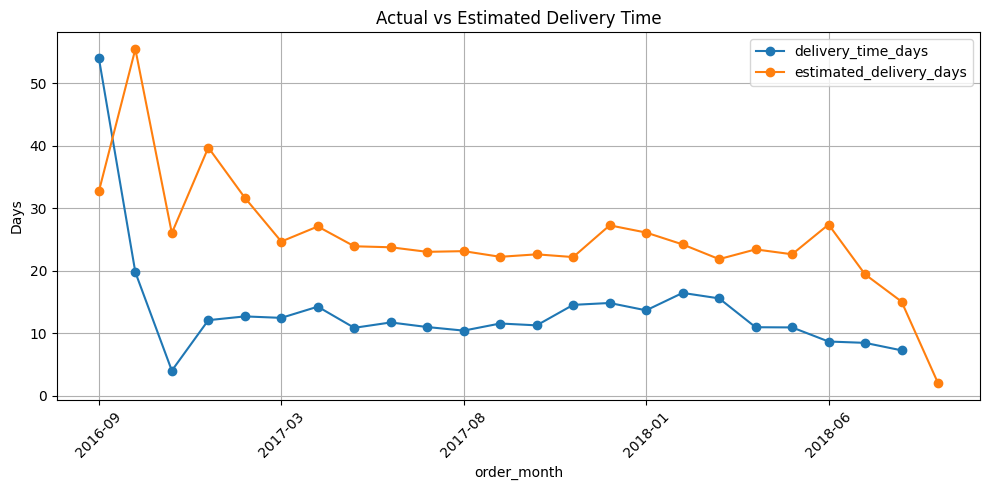

In [ ]:
#Actual vs Estimated delivery time
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

df["delivery_time_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["estimated_delivery_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days
df["order_month"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)

monthly_delivery = df.groupby("order_month")[["delivery_time_days", "estimated_delivery_days"]].mean()

monthly_delivery.plot(figsize=(10,5), marker="o", title="Actual vs Estimated Delivery Time")
plt.ylabel("Days")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


kpi 2: Revenue Contribution by State

C:\Users\MSI\AppData\Local\Temp\ipykernel_6656\1292739928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_revenue.index, y=state_revenue.values, palette="viridis")


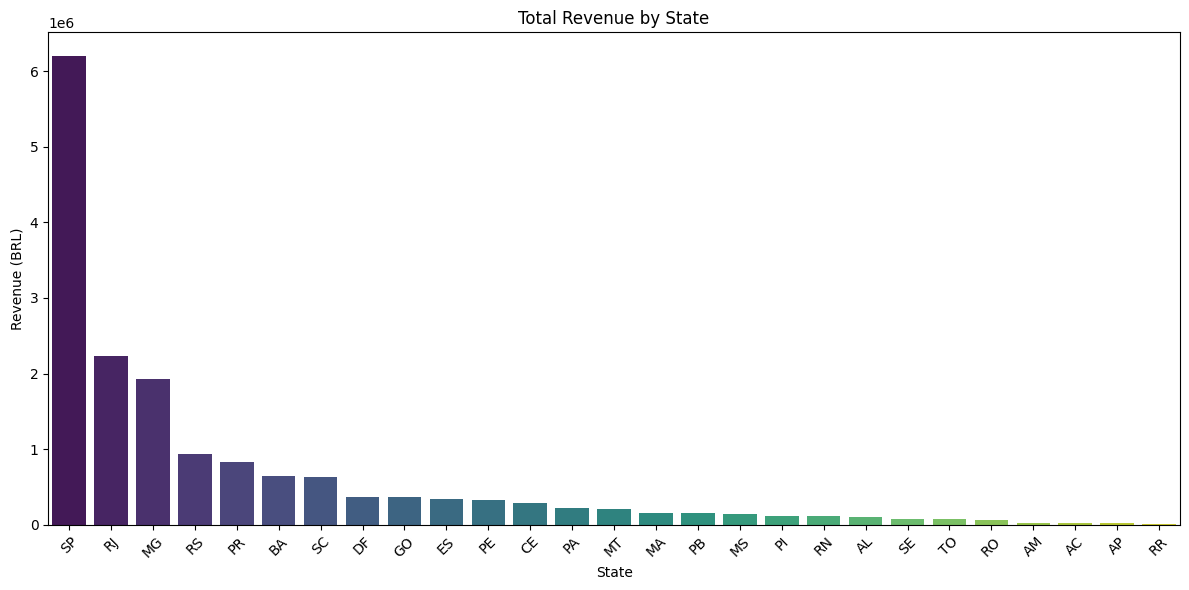

In [ ]:
# Total revenue by state
state_revenue = df.groupby("customer_state")["TotalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_revenue.index, y=state_revenue.values, palette="viridis")
plt.title("Total Revenue by State")
plt.xlabel("State")
plt.ylabel("Revenue (BRL)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


kpi 3: Return Rate Estimate by Category

C:\Users\MSI\AppData\Local\Temp\ipykernel_6656\1737870315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.values, y=return_rate.index, palette="rocket")


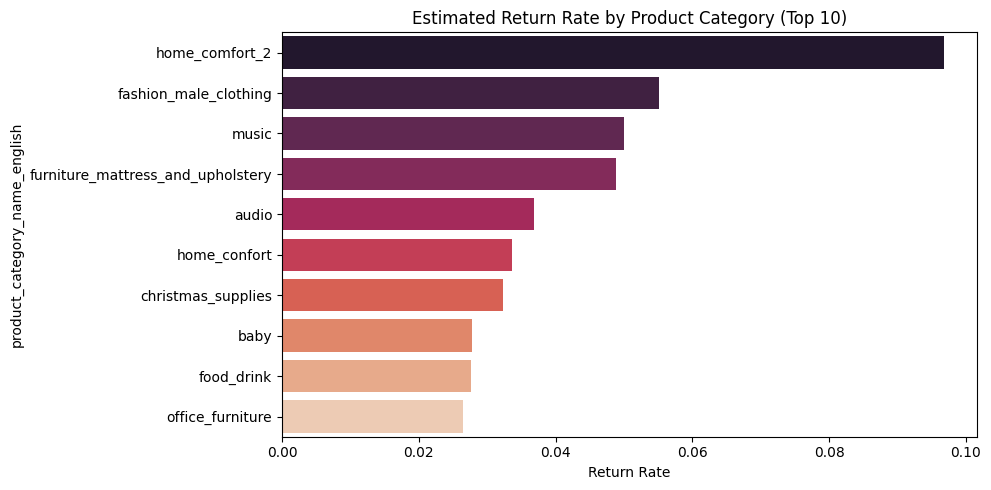

In [ ]:
#Estimated Return Rate by Product Category
df["delayed_flag"] = ((df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days > 10)

return_rate = df.groupby("product_category_name_english")["delayed_flag"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=return_rate.values, y=return_rate.index, palette="rocket")
plt.title("Estimated Return Rate by Product Category (Top 10)")
plt.xlabel("Return Rate")
plt.tight_layout()
plt.show()
